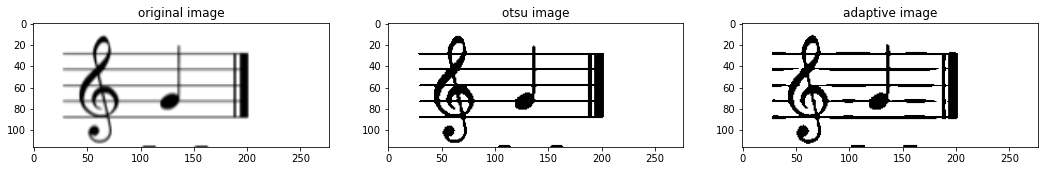

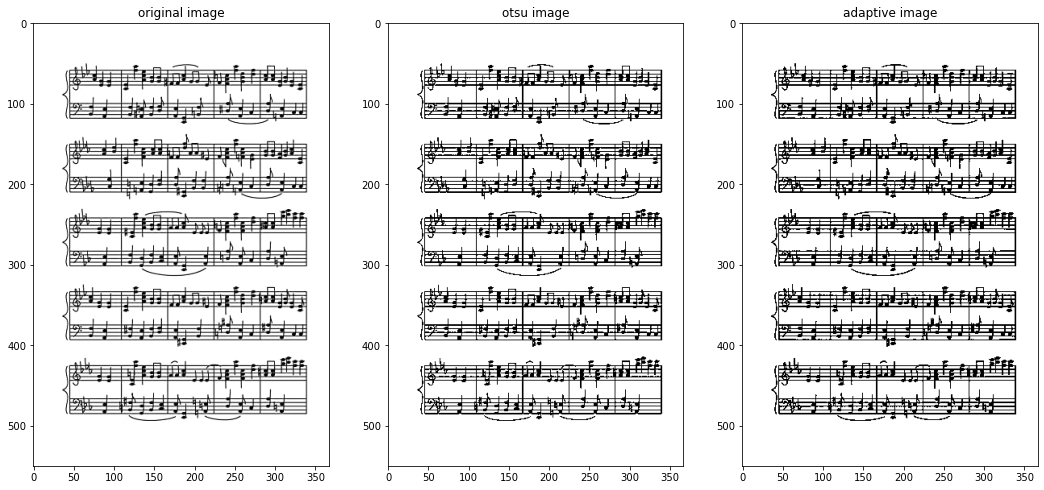

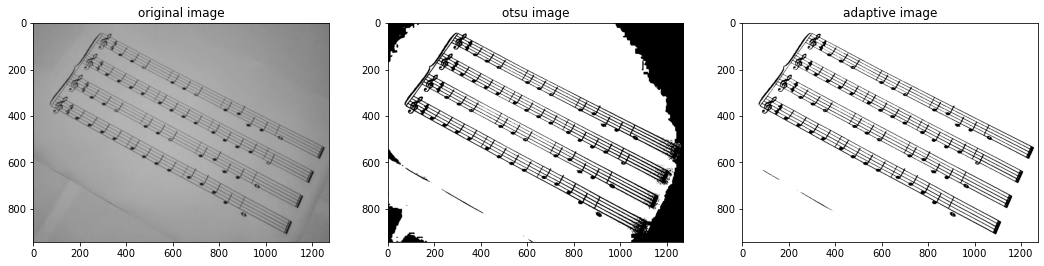

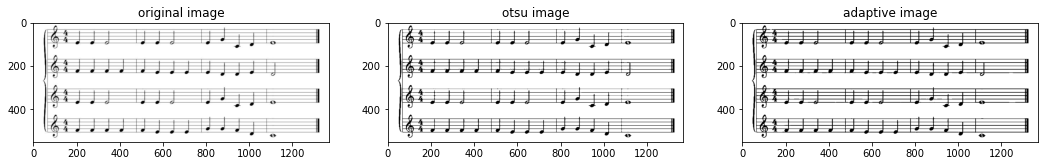

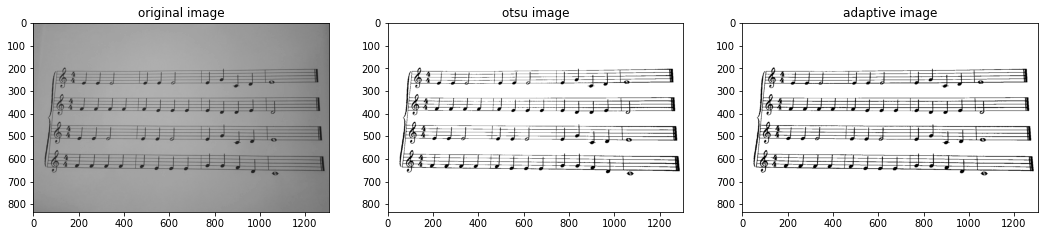

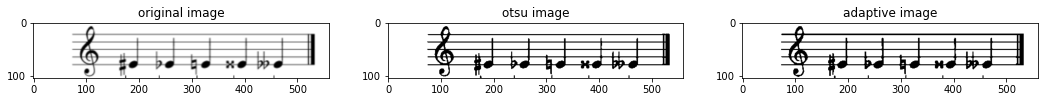

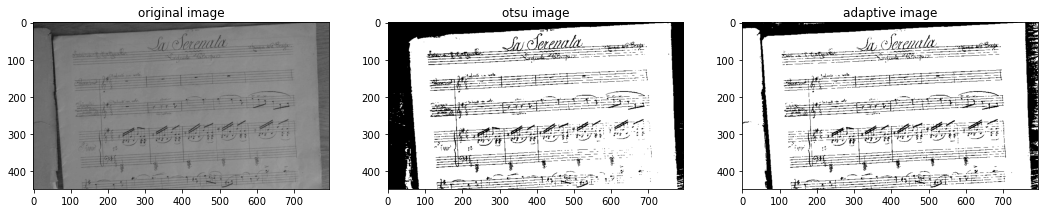

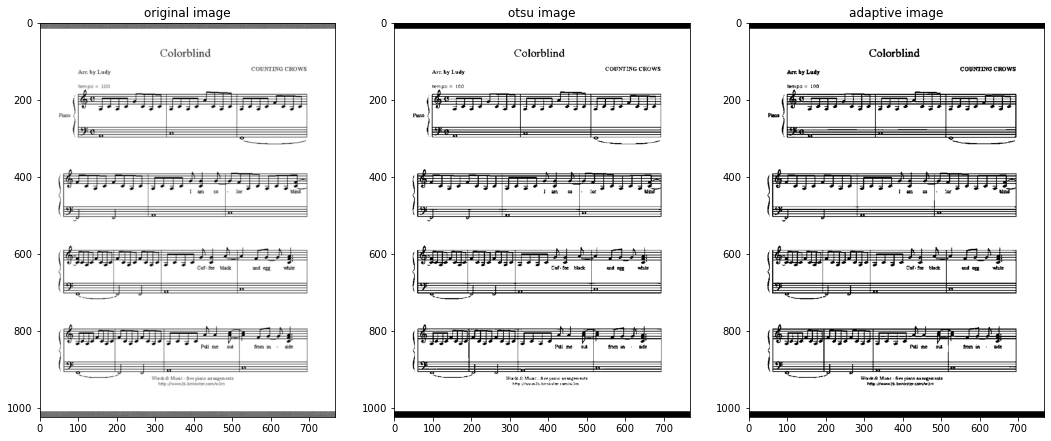

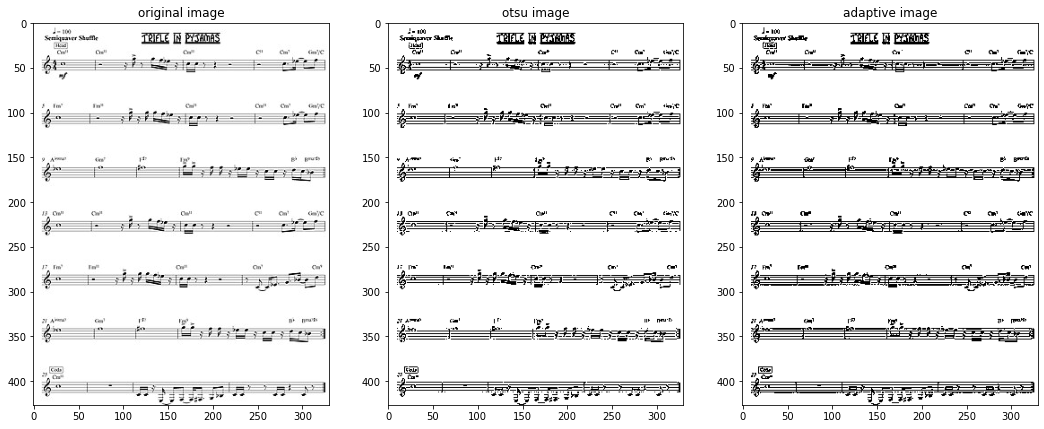

In [1]:
from commonfunctions import *
import os
from skimage.filters import threshold_otsu
from skimage.exposure import equalize_hist

directory = os.fsencode("./dataset")
dataset = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image = rgb2gray(io.imread(os.path.join('./dataset/', filename)))
        if image.dtype != "uint8":
            image = (image * 255).astype("uint8")
        dataset.append(image)
for img in dataset:
    binary = img > threshold_otsu(img)
    binary1 = adaptiveThresh(img, t = 15, div = 8)
    show_images([img, binary, binary1], ["original image", "otsu image", "adaptive image"])
